# 多項式特徴量

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RepeatedKFold,cross_val_score,train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [2]:
# データロード
df = sns.load_dataset('mpg') #mile per gallon：燃費データ
df.dropna(inplace=True)
X = df['horsepower'].values.reshape(-1, 1)
y = df['mpg'].values

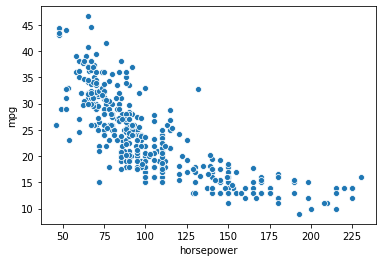

In [3]:
# 散布図
sns.scatterplot(x=df['horsepower'], y=df['mpg'])

In [4]:
# 多項式特徴量作成
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

In [5]:
# 学習
model = LinearRegression()
model.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [6]:
# 回帰モデルの描画
x_axis = np.arange(50, 230).reshape(-1, 1)
# 多項式特徴量に変換
X_axis_ = poly.fit_transform(x_axis)
y_pred = model.predict(X_axis_)

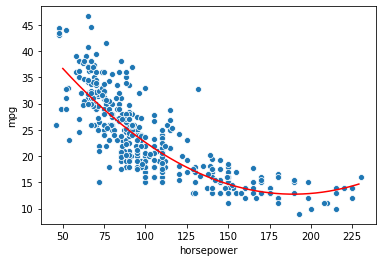

In [7]:
fig, ax = plt.subplots()
# 散布図
sns.scatterplot(x=df['horsepower'], y=df['mpg'], data=df, ax=ax)
# 回帰直線
ax.plot(x_axis, 
        y_pred,
        'r-')
plt.show()

## 線形回帰 VS 多項式回帰

In [8]:
# データ取得
df = sns.load_dataset('mpg')
df.dropna(inplace=True)
X = df['horsepower'].values.reshape(-1, 1)
# ndarrayで定義
# エラー：Passing list-likes to .loc or [] with any missing labels is no longer supportedが発生するため
y = df['mpg'].values

In [54]:
d_list = range(1, 4)
model = LinearRegression()

cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=0)

for d in d_list:
    # 多項式特徴量作成
    poly = PolynomialFeatures(degree=d, include_bias=False)
    X_poly = poly.fit_transform(X)

    scores = cross_val_score(model, X_poly, y, cv=cv, scoring='neg_mean_squared_error')
    print(f'degree={d} mean={np.mean(-scores)}')

degree=1 mean=24.235391801372007
degree=2 mean=19.294969517171673
degree=3 mean=19.433811692985575


In [55]:
# pipelineあり
d_list = range(1, 4)
# model = LinearRegression()

cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=0)

for d in d_list:
    # 多項式特徴量作成
    # poly = PolynomialFeatures(degree=d+1, include_bias=False)
    # X_poly = poly.fit_transform(X)

    # パイプライン
    pipeline = Pipeline(steps=[('poly', PolynomialFeatures(d)),
                               ('model', LinearRegression())])
    
    scores = cross_val_score(pipeline, X, y, cv=cv, scoring='neg_mean_squared_error')
    print(f'degree={d} mean={np.mean(-scores)}')

degree=1 mean=24.235391801372007
degree=2 mean=19.29496951717162
degree=3 mean=19.433811692940775


## kNN回帰（k Nearest Neighbor）

Text(0, 0.5, 'mpg')

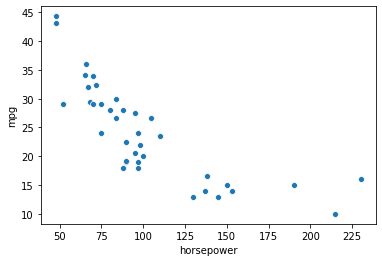

In [45]:
# ホールドアウト
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=0)
sns.scatterplot(x=X_train[:,0], y=y_train)
plt.xlabel('horsepower')
plt.ylabel('mpg')

In [39]:
# 学習
# n_neighbors：大⇒Bias大、小⇒Variance大
model = KNeighborsRegressor(n_neighbors=10)
model.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                    weights='uniform')

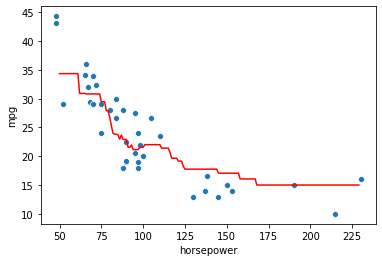

In [49]:
# kNN回帰モデルの描画
x_axis = np.arange(50, 230).reshape(-1, 1)
y_pred = model.predict(x_axis)

fig, ax = plt.subplots()
# 散布図
sns.scatterplot(x=X_train[:,0], y=y_train, ax=ax)
# 回帰直線
ax.plot(x_axis, 
        y_pred,
        'r-')
plt.xlabel('horsepower')
plt.ylabel('mpg')
plt.show()

## kNN回帰の精度比較

In [79]:
mse_list = []
k_list = range(1, 31)
n_splits=5
n_repeats=3

cv = RepeatedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=0)

for k in k_list:
    model = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv)
    mse_list.append(-np.mean(scores))

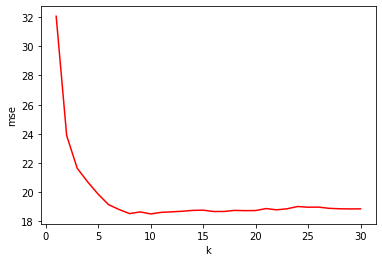

In [72]:
fig, ax = plt.subplots()

# MSE推移
ax.plot(k_list, 
        mse_list,
        'r-')
plt.xlabel('k')
plt.ylabel('mse')
plt.show()

In [78]:
print(f'Best performance: k={k_list[np.argmin(mse_list)]} mse={np.min(mse_list)}')

Best performance: k=10 mse=18.509221851130587
